<h1>Final IPL Model Pipeline with Accuracy Optimization and Visualizations</h1>

In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

<h2>loading data</h2>

In [5]:
matches_df = pd.read_csv("matches.csv")
deliveries_df = pd.read_csv("deliveries.csv")


In [9]:
matches_df.sample(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
159,419150,2009/10,Jaipur,2010-04-11,League,SR Tendulkar,Sawai Mansingh Stadium,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,field,Mumbai Indians,runs,37.0,175.0,20.0,N,NaN,BR Doctrove,SK Tarapore
756,1216492,2020/21,Abu Dhabi,2020-09-19,League,AT Rayudu,Sheikh Zayed Stadium,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,163.0,20.0,N,NaN,CB Gaffaney,VK Sharma
815,1237181,2020/21,NaN,2020-11-10,Final,TA Boult,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,157.0,20.0,N,NaN,CB Gaffaney,Nitin Menon
827,1254069,2021,Mumbai,2021-04-19,League,MM Ali,"Wankhede Stadium, Mumbai",Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Chennai Super Kings,runs,45.0,189.0,20.0,N,NaN,PR Reiffel,VK Sharma
679,1136604,2018,Indore,2018-05-12,League,SP Narine,Holkar Cricket Stadium,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,Kolkata Knight Riders,runs,31.0,246.0,20.0,N,NaN,CK Nandan,VK Sharma
556,980979,2016,Visakhapatnam,2016-05-10,League,A Zampa,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Rising Pune Supergiants,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,138.0,20.0,N,NaN,CB Gaffaney,VK Sharma
673,1136598,2018,Indore,2018-05-06,League,Mujeeb Ur Rahman,Holkar Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,153.0,20.0,N,NaN,C Shamshuddin,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,NaN,BF Bowden,M Erasmus
621,1082636,2017,Bangalore,2017-05-07,League,SP Narine,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,159.0,20.0,N,NaN,AY Dandekar,C Shamshuddin
80,392205,2009,Port Elizabeth,2009-05-02,League,YK Pathan,St George's Park,Deccan Chargers,Rajasthan Royals,Deccan Chargers,bat,Rajasthan Royals,wickets,3.0,142.0,20.0,N,NaN,S Asnani,BG Jerling


In [11]:
deliveries_df.sample(10)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
196030,1254067,2,Kolkata Knight Riders,Royal Challengers Bangalore,14,4,Shakib Al Hasan,KA Jamieson,AD Russell,0,0,0,NaN,0,NaN,NaN,NaN
184484,1216514,1,Rajasthan Royals,Royal Challengers Bangalore,17,6,JC Archer,Navdeep Saini,R Tewatia,4,0,4,NaN,0,NaN,NaN,NaN
124438,980917,1,Mumbai Indians,Gujarat Lions,17,4,TG Southee,DJ Bravo,KH Pandya,1,0,1,NaN,0,NaN,NaN,NaN
235245,1359512,2,Punjab Kings,Lucknow Super Giants,17,4,M Shahrukh Khan,Yash Thakur,JM Sharma,1,0,1,NaN,0,NaN,NaN,NaN
62855,548324,1,Rajasthan Royals,Royal Challengers Bangalore,2,4,AM Rahane,Z Khan,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
97107,729299,2,Royal Challengers Bangalore,Kolkata Knight Riders,6,2,PA Patel,R Vinay Kumar,YV Takawale,1,0,1,NaN,0,NaN,NaN,NaN
254150,1426281,1,Delhi Capitals,Mumbai Indians,13,2,SD Hope,L Wood,RR Pant,6,0,6,NaN,0,NaN,NaN,NaN
259749,1426306,2,Chennai Super Kings,Royal Challengers Bengaluru,13,6,MJ Santner,C Green,RA Jadeja,1,0,1,NaN,0,NaN,NaN,NaN
161250,1136606,1,Sunrisers Hyderabad,Chennai Super Kings,9,6,S Dhawan,DJ Bravo,KS Williamson,4,0,4,NaN,0,NaN,NaN,NaN
10281,336026,2,Delhi Daredevils,Royal Challengers Bangalore,7,2,AB de Villiers,JH Kallis,G Gambhir,1,0,1,NaN,0,NaN,NaN,NaN


In [15]:
matches_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

<h2>normalize the team</h2>

In [18]:
team_replacements = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Punjab Kings': 'Kings XI Punjab',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'
}
for col in ['team1', 'team2', 'toss_winner', 'winner', 'batting_team', 'bowling_team']:
    if col in matches_df.columns:
        matches_df[col] = matches_df[col].replace(team_replacements)
    if col in deliveries_df.columns:
        deliveries_df[col] = deliveries_df[col].replace(team_replacements)


valid_teams = [
    'Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
    'Delhi Capitals', 'Lucknow Super Giants', 'Gujarat Titans', 'Rajasthan Royals'
]
matches_df = matches_df[matches_df['team1'].isin(valid_teams) & matches_df['team2'].isin(valid_teams)]
deliveries_df = deliveries_df[deliveries_df['batting_team'].isin(valid_teams) & deliveries_df['bowling_team'].isin(valid_teams)]

print("Filtered Matches Data:")
print(matches_df.head())
print("Filtered Deliveries Data:")
print(deliveries_df.head())


Filtered Matches Data:
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla               Delhi Capitals   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_deci

<h2>feature engineering</h2>

In [21]:
batter_scores = deliveries_df.groupby(['match_id', 'batting_team', 'batter'])['batsman_runs'].sum().reset_index()
batter_scores = batter_scores.sort_values(['match_id', 'batting_team', 'batsman_runs'], ascending=[True, True, False])
top3 = batter_scores.groupby(['match_id', 'batting_team']).head(3)
top3_avg = top3.groupby(['match_id', 'batting_team'])['batsman_runs'].mean().reset_index()
top3_avg.rename(columns={'batsman_runs': 'avg_top3_runs'}, inplace=True)

print("Top 3 Batters Average Runs:")
print(top3_avg.head())

Top 3 Batters Average Runs:
   match_id                 batting_team  avg_top3_runs
0    335982        Kolkata Knight Riders      63.333333
1    335982  Royal Challengers Bangalore      11.666667
2    335983          Chennai Super Kings      59.666667
3    335983              Kings XI Punjab      49.666667
4    335984               Delhi Capitals      40.666667


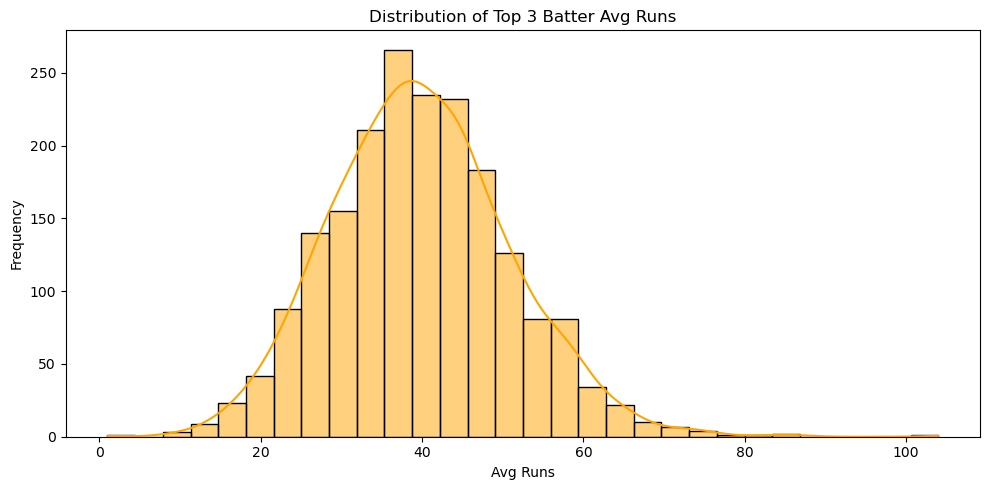

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(top3_avg['avg_top3_runs'], bins=30, kde=True, color='orange')
plt.title("Distribution of Top 3 Batter Avg Runs")
plt.xlabel("Avg Runs")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [25]:
first_innings = deliveries_df[deliveries_df["inning"] == 1]
innings_summary = first_innings.groupby("match_id")["total_runs"].sum().reset_index()
innings_summary.rename(columns={"total_runs": "team1_total_runs"}, inplace=True)

In [27]:
matches_df = pd.merge(matches_df, innings_summary, left_on="id", right_on="match_id", how="left")
matches_df = matches_df.merge(top3_avg, left_on=['id', 'team1'], right_on=['match_id', 'batting_team'], how='left')
matches_df.rename(columns={'avg_top3_runs': 'team1_avg_bat'}, inplace=True)
matches_df = matches_df.merge(top3_avg, left_on=['id', 'team2'], right_on=['match_id', 'batting_team'], how='left')
matches_df.rename(columns={'avg_top3_runs': 'team2_avg_bat'}, inplace=True)
matches_df.drop(columns=['batting_team_x', 'batting_team_y'], errors='ignore', inplace=True)

In [29]:
print("Data after merging features:")
print(matches_df[['team1', 'team2', 'team1_total_runs', 'team1_avg_bat', 'team2_avg_bat']].head())

Data after merging features:
                         team1                        team2  team1_total_runs  \
0  Royal Challengers Bangalore        Kolkata Knight Riders               222   
1              Kings XI Punjab          Chennai Super Kings               240   
2               Delhi Capitals             Rajasthan Royals               129   
3               Mumbai Indians  Royal Challengers Bangalore               165   
4        Kolkata Knight Riders          Sunrisers Hyderabad               110   

   team1_avg_bat  team2_avg_bat  
0      11.666667      63.333333  
1      49.666667      59.666667  
2      40.666667      25.333333  
3      35.000000      32.000000  
4      21.666667      23.000000  


In [31]:
matches_df['date'] = pd.to_datetime(matches_df['date'])
matches_df = matches_df.sort_values(by='date')

In [33]:
recent_wins = {}
team_recent_win_counts = []
for idx, row in matches_df.iterrows():
    team1, team2, winner = row['team1'], row['team2'], row['winner']
    team1_wins = recent_wins.get(team1, [])[-5:]
    team2_wins = recent_wins.get(team2, [])[-5:]
    team_recent_win_counts.append((sum(team1_wins), sum(team2_wins)))
    recent_wins.setdefault(team1, []).append(1 if team1 == winner else 0)
    recent_wins.setdefault(team2, []).append(1 if team2 == winner else 0)

matches_df[['team1_recent_wins', 'team2_recent_wins']] = pd.DataFrame(team_recent_win_counts, index=matches_df.index)

In [35]:
print("Momentum Stats Added:")
print(matches_df[['team1', 'team1_recent_wins', 'team2', 'team2_recent_wins']].head())


Momentum Stats Added:
                         team1  team1_recent_wins  \
0  Royal Challengers Bangalore                  0   
1              Kings XI Punjab                  0   
2               Delhi Capitals                  0   
3               Mumbai Indians                  0   
4        Kolkata Knight Riders                  1   

                         team2  team2_recent_wins  
0        Kolkata Knight Riders                  0  
1          Chennai Super Kings                  0  
2             Rajasthan Royals                  0  
3  Royal Challengers Bangalore                  0  
4          Sunrisers Hyderabad                  0  


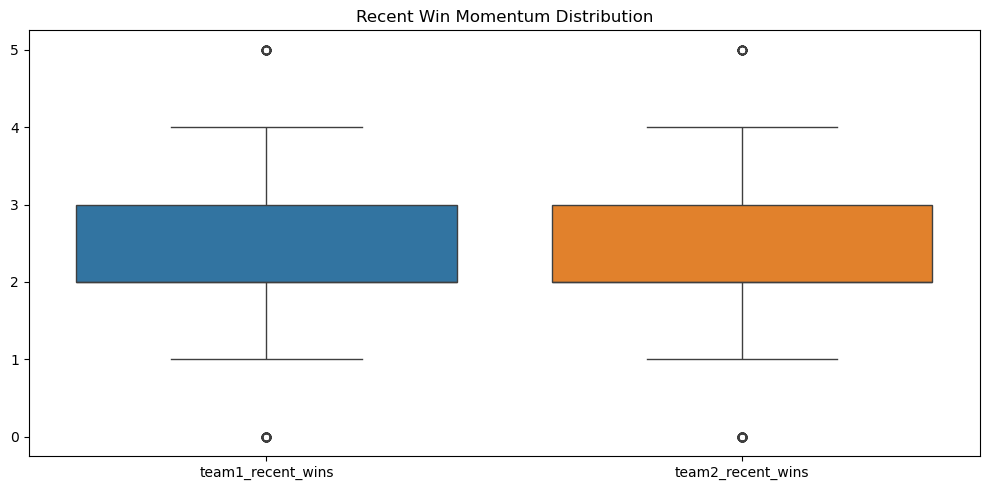

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=matches_df[['team1_recent_wins', 'team2_recent_wins']])
plt.title("Recent Win Momentum Distribution")
plt.tight_layout()
plt.show()

In [39]:
features = [
    "season", "city", "venue", "team1", "team2", "toss_winner", "toss_decision",
    "team1_total_runs", "team1_recent_wins", "team2_recent_wins", "team1_avg_bat", "team2_avg_bat"
]
target = "winner"

In [41]:
model_df = matches_df[features + [target]].dropna()
model_df = model_df[model_df[target].notnull() & (model_df[target] != "tie") & (model_df[target] != "no result")]

In [43]:
print("Final Modeling Data:")
print(model_df.head())


Final Modeling Data:
    season        city                                       venue  \
0  2007/08   Bangalore                       M Chinnaswamy Stadium   
1  2007/08  Chandigarh  Punjab Cricket Association Stadium, Mohali   
2  2007/08       Delhi                            Feroz Shah Kotla   
3  2007/08      Mumbai                            Wankhede Stadium   
4  2007/08     Kolkata                                Eden Gardens   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2               Delhi Capitals             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders          Sunrisers Hyderabad   

                   toss_winner toss_decision  team1_total_runs  \
0  Royal Challengers Bangalore         field               222   
1          Chennai Super Kings           bat   

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib
import json

In [47]:
le = LabelEncoder()
model_df['target'] = le.fit_transform(model_df[target])

In [49]:
cat_feats = ["season", "city", "venue", "team1", "team2", "toss_winner", "toss_decision"]
num_feats = ["team1_total_runs", "team1_recent_wins", "team2_recent_wins", "team1_avg_bat", "team2_avg_bat"]

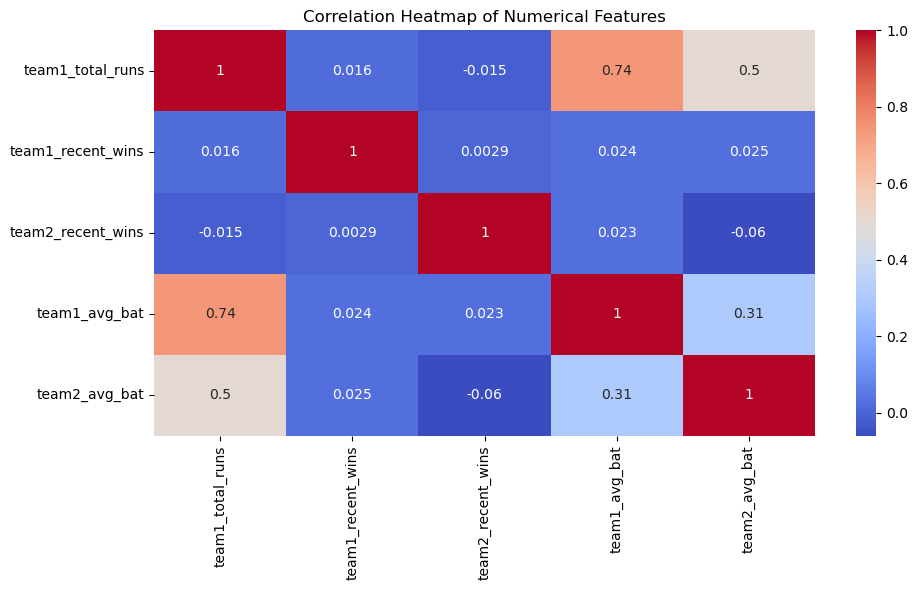

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(model_df[num_feats].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

<h2>modeltraning andpipeline structure</h2>

In [53]:

cat_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
num_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

preprocessor = ColumnTransformer([
    ("cat", cat_transform, cat_feats),
    ("num", num_transform, num_feats)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [55]:
params = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [10, 20],
    "classifier__min_samples_split": [2, 5]
}


In [57]:
X = model_df[cat_feats + num_feats]
y = model_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
grid = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['season',
                                                                          'city',
                                                                          'venue',
                                                                          'team1',
                                                                          'team2',
                                                                          'toss_winner',
                                                                          'toss_decision']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['team1_total_runs',
                                                                          'team1_recent_wins',
                                                                          'team2_recent_wins',
                                                                          'team1_avg_bat',
                                                                          'team2_avg_bat'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [61]:
best_model = grid.best_estimator_
preds = best_model.predict(X_test)

In [63]:
print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds, average='weighted'))
print(classification_report(y_test, preds))

Best Params: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Accuracy: 0.5675675675675675
F1 Score: 0.5565074237501327
              precision    recall  f1-score   support

           0       0.74      0.57      0.65        35
           1       0.56      0.59      0.57        17
           2       0.50      0.33      0.40         6
           3       0.22      0.17      0.19        12
           4       0.53      0.94      0.68        17
           5       0.33      0.33      0.33         3
           6       0.61      0.79      0.69        29
           7       0.45      0.50      0.47        18
           8       0.57      0.55      0.56        22
           9       0.67      0.38      0.49        26

    accuracy                           0.57       185
   macro avg       0.52      0.52      0.50       185
weighted avg       0.58      0.57      0.56       185



In [65]:
joblib.dump(best_model, "ipl_match_winner_model.pkl")
joblib.dump(le, "winner_label_encoder.pkl")


['winner_label_encoder.pkl']

In [67]:
def generate_llm_prompt(input_data, prediction_label):
    readable = json.dumps(input_data, indent=2)
    return f"""
    Predicting IPL Match Outcome
    ----------------------------
    Input Features:
    {readable}

    Predicted Winner: {prediction_label}

    Can you explain why this team is predicted to win?
    """

In [69]:
def call_ollama_llm(prompt, model_name="llama3"):
    try:
        response = requests.post(
            "http://localhost:11434/api/generate",
            json={"model": model_name, "prompt": prompt},
            stream=True
        )
        response.raise_for_status()
        reply = ""
        for line in response.iter_lines():
            if line:
                try:
                    chunk = json.loads(line)
                    reply += chunk.get("response", "")
                except json.JSONDecodeError:
                    continue
        return reply.strip()
    except requests.exceptions.RequestException as e:
        return f"Failed to connect to Ollama LLM server: {str(e)}"


In [ ]:
<h2> samop

In [72]:
sample_input = X_test.iloc[0:1]
sample_transformed = best_model.named_steps['preprocessor'].transform(sample_input)
sample_prediction = best_model.named_steps['classifier'].predict(sample_transformed)
sample_winner = le.inverse_transform(sample_prediction)[0]
prompt = generate_llm_prompt(sample_input.to_dict(orient="records")[0], sample_winner)
print("\nLLM Prompt Preview:\n")
print(prompt)
print("\nLLM Reasoning Response:\n")
print(call_ollama_llm(prompt))


LLM Prompt Preview:


    Predicting IPL Match Outcome
    ----------------------------
    Input Features:
    {
  "season": "2013",
  "city": "Chandigarh",
  "venue": "Punjab Cricket Association Stadium, Mohali",
  "team1": "Kings XI Punjab",
  "team2": "Sunrisers Hyderabad",
  "toss_winner": "Kings XI Punjab",
  "toss_decision": "field",
  "team1_total_runs": 150,
  "team1_recent_wins": 1,
  "team2_recent_wins": 2,
  "team1_avg_bat": 28.0,
  "team2_avg_bat": 38.333333333333336
}

    Predicted Winner: Sunrisers Hyderabad

    Can you explain why this team is predicted to win?
    

LLM Reasoning Response:

A fascinating task! Let's analyze the input features and the predicted outcome.

The predicted winner is Sunrisers Hyderabad, which might seem counterintuitive given that Kings XI Punjab won the toss and chose to field. However, upon closer inspection of the features, here are some points that could have contributed to the prediction:

1. **Team2_recent_wins**: Sunrisers Hyderaba